# Calculate morphology features for segmented cells in an image

This example shows how to use `squidpy.im.quantify_morphology` to calculate morphology features
like area and granularity for segmented cells in an image.

As input, `quantify_morphology` requires an `SpatialData` object with both intensity images and labels
of the segmented cells. 
The results of `quantify_morphology` are then written to the dataframe `obsm["morphology"]` of the relevant
`anndata` table in the `sdata` object  


In [37]:
from itertools import count

## Imports
import spatialdata as sd
import squidpy as sq
import scanpy as sc
import seaborn as sns
import umap
import umap.plot


## Loading the data
Please download the data from here: [MIBI-TOF dataset](https://s3.embl.de/spatialdata/spatialdata-sandbox/mibitof.zip) and adjust the variable containing the location of the `.zarr` file.


In [38]:
mibitof_zarr_path = "./mibitof.zarr"
mibitof_sdata = sd.read_zarr(mibitof_zarr_path)
mibitof_sdata

SpatialData object, with associated Zarr store: /home/npeschke/nas/studium/Master/internships/theis/data/spatialdata_tutorial/download/mibitof/data.zarr
├── Images
│     ├── 'point8_image': DataArray[cyx] (3, 1024, 1024)
│     ├── 'point16_image': DataArray[cyx] (3, 1024, 1024)
│     └── 'point23_image': DataArray[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': DataArray[yx] (1024, 1024)
│     ├── 'point16_labels': DataArray[yx] (1024, 1024)
│     └── 'point23_labels': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3309, 36)
with coordinate systems:
    ▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
    ▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
    ▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

## Visualise the data
We're going to create a naiive visualisation of the data, overlaying the segmented cells and the tissue images. For this, we need to load the `spatialdata_plot` library which extends the `sd.SpatialData` object with the `.pl` module. 

In [39]:
import spatialdata_plot
# mibitof_sdata.pl.render_images().pl.show()
# mibitof_sdata.pp.get_elements("point8").pl.render_images().pl.render_labels().pl.show()

#### Calling `quantify_morphology` on the sdata object.

Additionally, specific methods can be selected using the `methods` parameter. By default (`methods=None`), `quantify_morphology` calculates all available methods.
Custom functions can also be supplied. They must take in a label image and an intensity image as the first two arguments and return a list of values for each label.

In [40]:
sq.im.quantify_morphology(
    sdata=mibitof_sdata,
    label="point8_labels",
    image="point8_image",
    methods=None,
)

/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/skimage/measure/_regionprops.py:685: RuntimeWarning: invalid value encountered in divide
  tuple(M[_get_element(axis)] / M0 for axis in range(self._ndim))
/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


area  area_bbox  area_convex  area_filled  \
library_id    cell_id                                                 
point8_labels 1          729.0     1150.0        791.0        729.0   
              2          474.0      792.0        548.0        474.0   
              3        66882.0   199562.0      97916.0      70846.0   
              4          126.0      160.0        130.0        126.0   
              5          398.0      544.0        422.0        398.0   
...                        ...        ...          ...          ...   
              1177       231.0      308.0        240.0        231.0   
              1178       216.0      256.0        224.0        216.0   
              1179       185.0      247.0        195.0        185.0   
              1180        41.0       60.0         44.0         41.0   
              1181       138.0      200.0        147.0        138.0   

                       axis_major_length  axis_minor_length  eccentricity  \
library_id    cell_id                                                       
point8_labels 1                45.533634          22.098953      0.874330   
              2                37.475009          18.037825      0.876540   
              3               549.334274         193.043864      0.936220   
              4                16.493540          10.334951      0.779336   
              5                32.044721          17.048157      0.846737   
...                                  ...                ...           ...   
              1177             21.310580          14.765740      0.721050   
              1178             17.840579          16.193968      0.419611   
              1179             17.921029          14.211207      0.609234   
              1180              9.386904           6.020806      0.767203   
              1181             19.220222           9.848740      0.858738   

                       equivalent_diameter_area  euler_number    extent  ...  \
library_id    cell_id                                                    ...   
point8_labels 1                       30.466238             1  0.633913  ...   
              2                       24.566553             1  0.598485  ...   
              3                      291.816393            -4  0.335144  ...   
              4                       12.666025             1  0.787500  ...   
              5                       22.511094             1  0.731618  ...   
...                                         ...           ...       ...  ...   
              1177                    17.149879             1  0.750000  ...   
              1178                    16.583719             1  0.843750  ...   
              1179                    15.347616             1  0.748988  ...   
              1180                     7.225152             1  0.683333  ...   
              1181                    13.255454             1  0.690000  ...   

                       granularity_ch2_6  granularity_ch2_7  \
library_id    cell_id                                         
point8_labels 1                      0.0                0.0   
              2                      0.0                0.0   
              3                      0.0                0.0   
              4                      0.0                0.0   
              5                      0.0                0.0   
...                                  ...                ...   
              1177                   0.0                0.0   
              1178                   0.0                0.0   
              1179                   0.0                0.0   
              1180                   0.0                0.0   
              1181                   0.0                0.0   

                       granularity_ch2_8  granularity_ch2_9  \
library_id    cell_id                                         
point8_labels 1                      0.0                0.0   
              2                      0.0          

Aside from returning the results as a dataframe, they are also written to the obsm key `"morphology"`: 

In [41]:
mibitof_sdata["table"].obsm["morphology"]

,library_id,cell_id,area,area_bbox,area_convex,area_filled,axis_major_length,axis_minor_length,eccentricity,equivalent_diameter_area,...,granularity_ch2_6,granularity_ch2_7,granularity_ch2_8,granularity_ch2_9,granularity_ch2_10,granularity_ch2_11,granularity_ch2_12,granularity_ch2_13,granularity_ch2_14,granularity_ch2_15
9376-1,point8_labels,2,474.0,792.0,548.0,474.0,37.475009,18.037825,0.876540,24.566553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9377-1,point8_labels,4,126.0,160.0,130.0,126.0,16.493540,10.334951,0.779336,12.666025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9378-1,point8_labels,5,398.0,544.0,422.0,398.0,32.044721,17.048157,0.846737,22.511094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9379-1,point8_labels,6,1749.0,2162.0,1789.0,1749.0,55.743765,41.339948,0.670835,47.189999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9380-1,point8_labels,7,407.0,527.0,443.0,407.0,34.021677,16.444643,0.875423,22.764193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270-0,point23_labels,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271-0,point23_labels,1480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4272-0,point23_labels,1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4273-0,point23_labels,1482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Depending on the return type of the individual morphology method, multiple columns can be generated for a single method. 
This depends on if the individual method calculates results for each color channel, 
or might even return multiple results per color channel like granularity.

The way the columns are names is as follows:
- single result value: `<method_name>`
- one result per channel: `<method_name>_ch<channel_number>`
- multiple results per channel: `<method_name>_ch<channel_number>_<result_number>`
- multiple results but not associated to channels: `<method_name>_<result_number>`

This way a flat datastructure is generated without any nested objects like numpy arrays within a field.

## Clustering morphology results


Data cleanup for clustering
- Removing NaNs
    - keeping a record of removed rows to later be able to annotate clusters 
- Removing columns with entirely identical values (prevents z-score calculation)
 

In [42]:
data = mibitof_sdata.filter_by_coordinate_system("point8")["table"].obsm["morphology"].copy(deep=True)    

In [43]:
na_rows = data.isna().any(axis=1)

In [44]:
na_rows

9376-1      True
9377-1     False
9378-1     False
9379-1      True
9380-1     False
           ...  
10416-1    False
10417-1    False
10418-1     True
10419-1    False
10420-1    False
Length: 1045, dtype: bool

In [45]:
data = data.loc[~na_rows, :]

In [46]:
data = data.loc[:, data.nunique() > 1]

In [47]:
data

,cell_id,area,area_bbox,area_convex,area_filled,axis_major_length,axis_minor_length,eccentricity,equivalent_diameter_area,extent,...,granularity_ch1_4,granularity_ch1_5,granularity_ch1_6,granularity_ch2_0,granularity_ch2_1,granularity_ch2_2,granularity_ch2_3,granularity_ch2_4,granularity_ch2_5,granularity_ch2_6
9377-1,4,126.0,160.0,130.0,126.0,16.493540,10.334951,0.779336,12.666025,0.787500,...,0.0,0.0,0.0,19.855596,33.393502,46.750903,0.000000,0.0,0.0,0.0
9378-1,5,398.0,544.0,422.0,398.0,32.044721,17.048157,0.846737,22.511094,0.731618,...,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9380-1,7,407.0,527.0,443.0,407.0,34.021677,16.444643,0.875423,22.764193,0.772296,...,0.0,0.0,0.0,29.850746,45.895522,24.253731,0.000000,0.0,0.0,0.0
9381-1,8,2466.0,3840.0,2987.0,2466.0,74.234507,46.636172,0.778030,56.033996,0.642188,...,0.0,0.0,0.0,83.454988,16.545012,0.000000,0.000000,0.0,0.0,0.0
9383-1,12,789.0,946.0,814.0,789.0,44.521755,23.641098,0.847371,31.695205,0.834038,...,0.0,0.0,0.0,29.321663,51.641138,19.037199,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10415-1,1176,233.0,270.0,244.0,233.0,18.898305,16.438354,0.493348,17.223960,0.862963,...,0.0,0.0,0.0,43.577982,56.422018,0.000000,0.000000,0.0,0.0,0.0
10416-1,1177,231.0,308.0,240.0,231.0,21.310580,14.765740,0.721050,17.149879,0.750000,...,0.0,0.0,0.0,69.850746,30.149254,0.000000,0.000000,0.0,0.0,0.0
10417-1,1178,216.0,256.0,224.0,216.0,17.840579,16.193968,0.419611,16.583719,0.843750,...,0.0,0.0,0.0,26.086957,57.437071,0.000000,16.475973,0.0,0.0,0.0
10419-1,1180,41.0,60.0,44.0,41.0,9.386904,6.020806,0.767203,7.225152,0.683333,...,0.0,0.0,0.0,71.428571,28.571429,0.000000,0.000000,0.0,0.0,0.0


In [48]:
(data == 0).all(axis=0).any()

False

In [49]:
data.isna().any().any()

False

/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


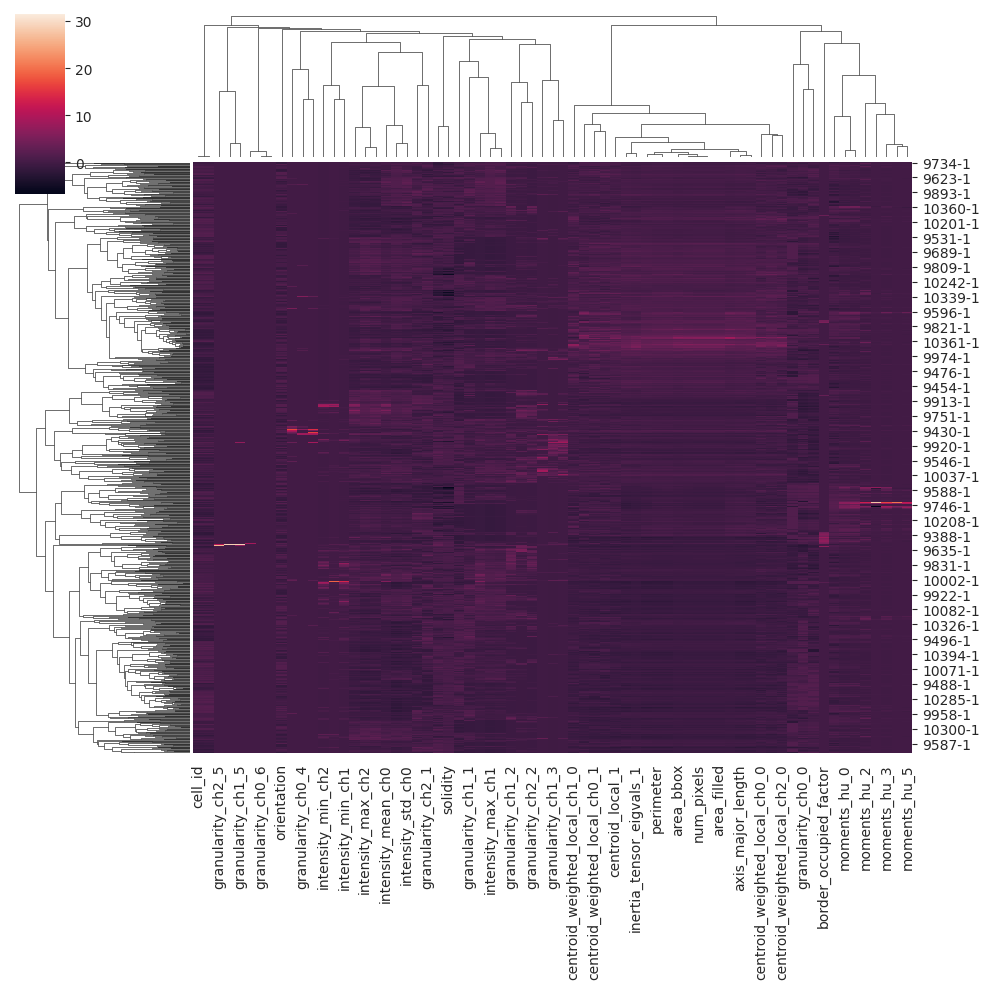

In [50]:
sns.clustermap(
    data=data,
    metric="cosine",
    row_cluster=True,
    col_cluster=True,
    z_score=1,
    #standard_scale=1, # standardize column-wise
)

In [51]:
umap_embedding = umap.UMAP().fit(data)

In [52]:
mibitof_sdata.filter_by_coordinate_system("point8")["table"].obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,batch,library_id
9376-1,9479,8,2,65222.0,37.0,6.0,474.0,carcinoma,90de,Epithelial,1,point8_labels
9377-1,9480,8,4,65224.0,314.0,3.0,126.0,carcinoma,90de,Epithelial,1,point8_labels
9378-1,9481,8,5,65225.0,407.0,6.0,398.0,carcinoma,90de,Epithelial,1,point8_labels
9379-1,9482,8,6,65226.0,439.0,20.0,1749.0,carcinoma,90de,Epithelial,1,point8_labels
9380-1,9483,8,7,65227.0,479.0,6.0,407.0,carcinoma,90de,Imm_other,1,point8_labels
...,...,...,...,...,...,...,...,...,...,...,...,...
10416-1,10529,8,1177,66397.0,153.0,1017.0,231.0,carcinoma,90de,Epithelial,1,point8_labels
10417-1,10530,8,1178,66398.0,998.0,1016.0,216.0,carcinoma,90de,Tcell_CD8,1,point8_labels
10418-1,10531,8,1179,66399.0,428.0,1017.0,185.0,carcinoma,90de,Fibroblast,1,point8_labels
10419-1,10532,8,1180,66400.0,537.0,1021.0,41.0,carcinoma,90de,Imm_other,1,point8_labels


In [53]:
cluster_labels = mibitof_sdata.filter_by_coordinate_system("point8")["table"].obs["Cluster"].loc[~na_rows]

<Axes: >

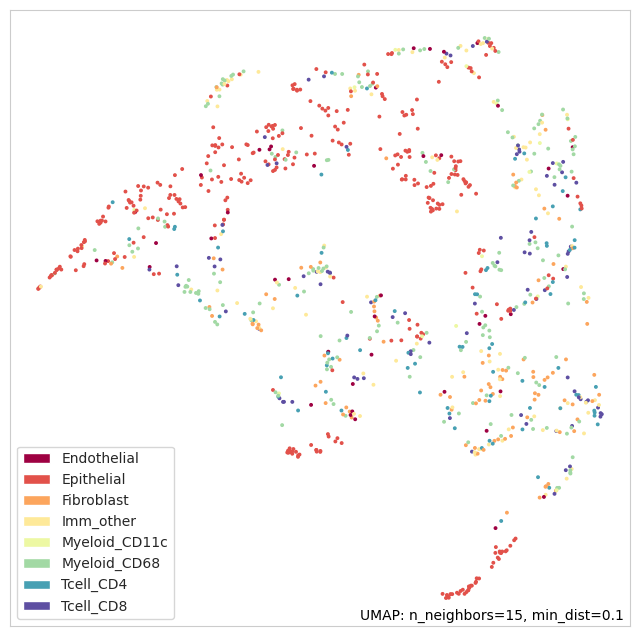

In [54]:
umap.plot.points(umap_embedding, labels=cluster_labels)

### Comparison with count based clustering

In [55]:
counts_data = sd.deepcopy(mibitof_sdata.filter_by_coordinate_system("point8")["table"])
# len(counts_data) == len(na_rows)
# counts_data.obs_names
# na_rows.shape
counts_data = counts_data[~na_rows, :]
# counts_data.obs = counts_data.obs[~na_rows]

In [56]:
counts_data.X.data

array([-0.08141299,  0.02584101, -0.06292887, ..., -0.00451912,
       -0.15506616, -0.03538407], dtype=float32)

In [57]:
counts_data.layers["counts"] = counts_data.X.copy()
sc.pp.normalize_total(counts_data, inplace=True)
# sc.pp.log1p(counts_data)
# sc.pp.pca(counts_data)
sc.pp.neighbors(counts_data)
sc.tl.umap(counts_data)
sc.tl.leiden(counts_data)

/tmp/ipykernel_128264/3993885290.py:1: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  counts_data.layers["counts"] = counts_data.X.copy()
/home/npeschke/miniconda3/envs/mamba/envs/squidpy-dev/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/tmp/ipykernel_128264/3993885290.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(counts_data)


In [62]:
counts_data

AnnData object with n_obs × n_vars = 992 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id', 'leiden'
    uns: 'spatialdata_attrs', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_scanorama', 'X_umap', 'spatial', 'morphology'
    layers: 'counts'
    obsp: 'distances', 'connectivities'